In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
import numpy as np
import pandas as pd

data = pd.read_csv('Data_to_applicants.csv')

##Exploring Data Analysis##

In [3]:
#datalookup
data.head()

id  radius_mean  ...  fractal_dimension_worst  diagnosis
0    842934       19.772  ...                    0.133          M
1    843149       22.601  ...                    0.196          M
2  84301535       21.507  ...                    0.126          M
3  84348933       12.505  ...                    0.349          M
4  84359034       22.227  ...                    0.107          M

[5 rows x 32 columns]

In [4]:
print("Data dimensions : {}".format(data.shape))

Data dimensions : (569, 32)


In [5]:
data['diagnosis'].value_counts()


B    357
M    212
Name: diagnosis, dtype: int64

Text(0, 0.5, 'Frequency')

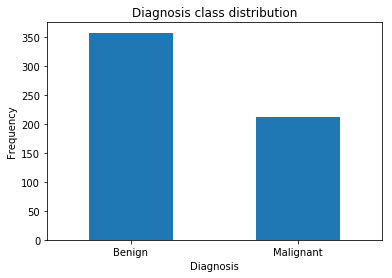

In [6]:
import matplotlib.pyplot as plt
LABELS=["Benign","Malignant"]
data['diagnosis'].value_counts().plot(kind ='bar', rot = 0)
plt.title("Diagnosis class distribution")
plt.xticks(range(2),LABELS)
plt.xlabel("Diagnosis")
plt.ylabel("Frequency")

In [7]:
print("Data description: \n")
data.describe()#include = 'all')

Data description: 



id  radius_mean  ...  symmetry_worst  fractal_dimension_worst
count  5.690000e+02   569.000000  ...      569.000000               569.000000
mean   3.037246e+07    15.479306  ...        0.317984                 0.091181
std    1.250206e+08     3.859522  ...        0.081970                 0.054831
min    9.302000e+03     7.605000  ...        0.103000                -0.051000
25%    8.698500e+05    12.796000  ...        0.263000                 0.055000
50%    9.066560e+05    14.576000  ...        0.310000                 0.091000
75%    8.813761e+06    17.343000  ...        0.368000                 0.126000
max    9.113211e+08    30.802000  ...        0.737000                 0.349000

[8 rows x 31 columns]

In [8]:
print('Datatyes: ')
data.dtypes

Datatyes: 


id                           int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

###Data Cleaning###
####Processing the missing values####

In [9]:
print("Check for missing data points: ")
data.isnull().sum()

Check for missing data points: 


id                         0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            1
compactness_mean           1
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     1
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    1
smoothness_se              0
compactness_se             0
concavity_se               1
concave points_se          1
symmetry_se                1
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            1
area_worst                 1
smoothness_worst           0
compactness_worst          1
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
diagnosis                  0
dtype: int64

Visualizing location of missing data: 


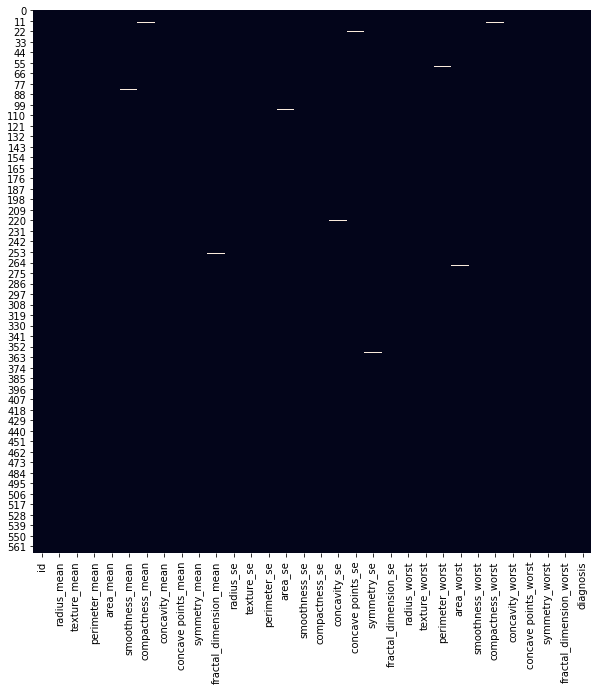

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
print("Visualizing location of missing data: ")
plt.figure(figsize=(10, 10))
sns.heatmap(data.isnull(), cbar=False)

In [11]:
print("Extracting rows with empty data points: ")
emptyData=data.columns[data.isnull().any()]
data[data.isnull().any(axis=1)][emptyData]

Extracting rows with empty data points: 


smoothness_mean  compactness_mean  ...  area_worst  compactness_worst
13             0.023               NaN  ...     960.288                NaN
23             0.087             0.122  ...    2864.964              0.439
59             0.025            -0.006  ...     301.120              0.157
83               NaN             0.213  ...    1422.093              0.340
104            0.137             0.125  ...     441.337              0.135
221            0.174             0.123  ...     752.266              0.251
255            0.106             0.137  ...     904.904              0.346
268            0.115             0.008  ...         NaN              0.190
359            0.120             0.102  ...     481.685              0.158

[9 rows x 10 columns]

In the given dataset, the missing values count to 10 only. As per the tradition, the missing values can be processed by predictive modeling, drop or replace options. I'm using replace option by replacing Nan with the mean value of the variable.

In [0]:
#Replacing missing value by mean
data.fillna(data.mean(), inplace=True)

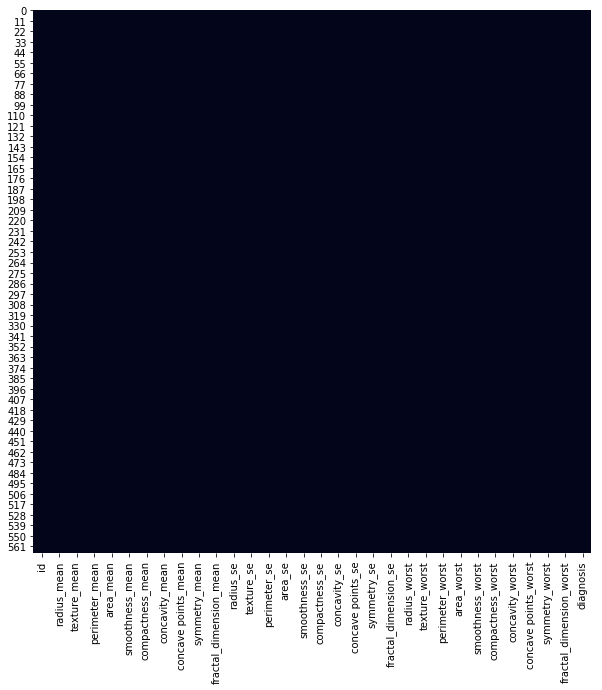

In [13]:
# Reviewing the repacement via visualization 
plt.figure(figsize=(10, 10))
sns.heatmap(data.isnull(), cbar=False)

In [14]:
# Data transformation of dependent variable

#Encoding categorical data values
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
data["diagnosis"] = labelencoder_Y.fit_transform(data["diagnosis"])
data["diagnosis"].head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

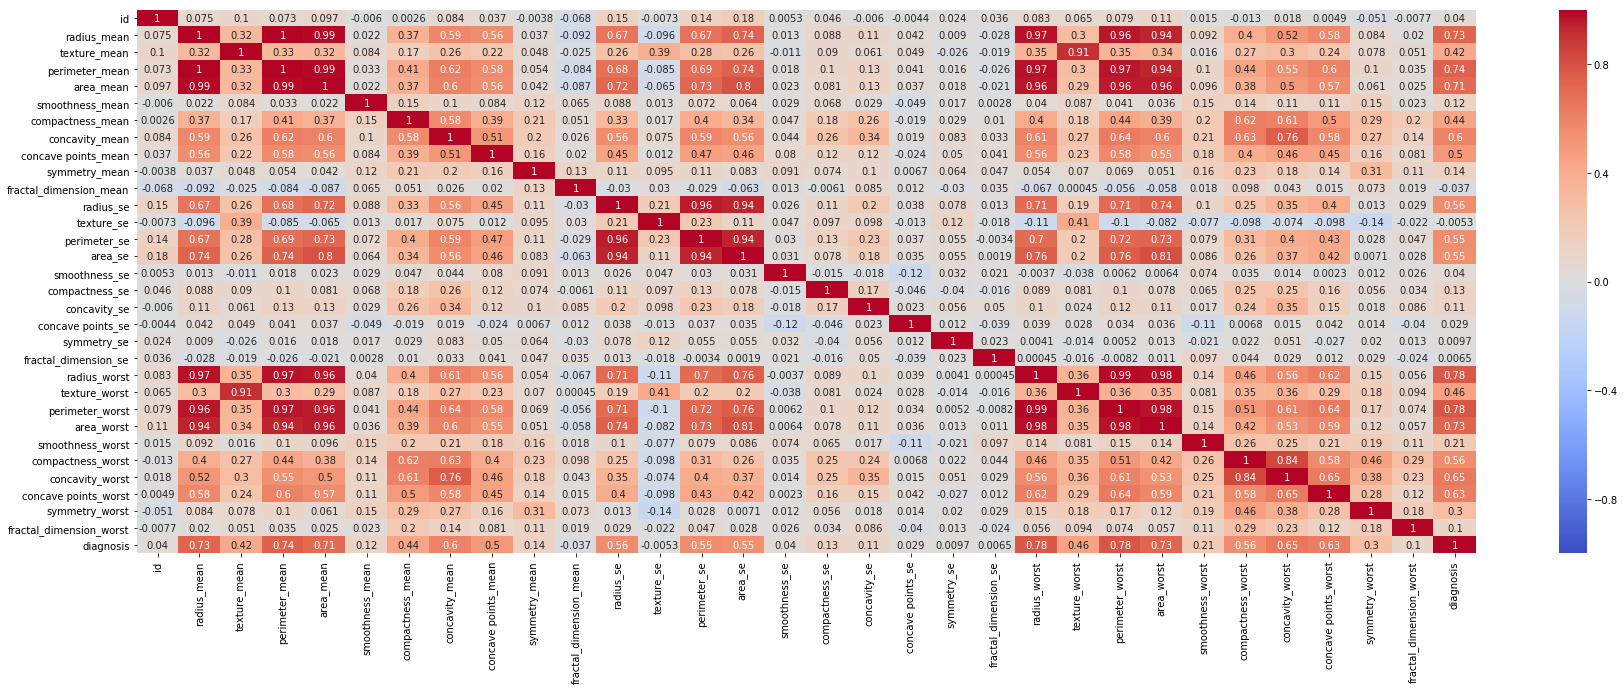

In [15]:
plt.figure(figsize=(30,10))
corr = data.corr()
sns.heatmap(corr, vmin=-1,vmax=1,cmap='coolwarm',annot=True)

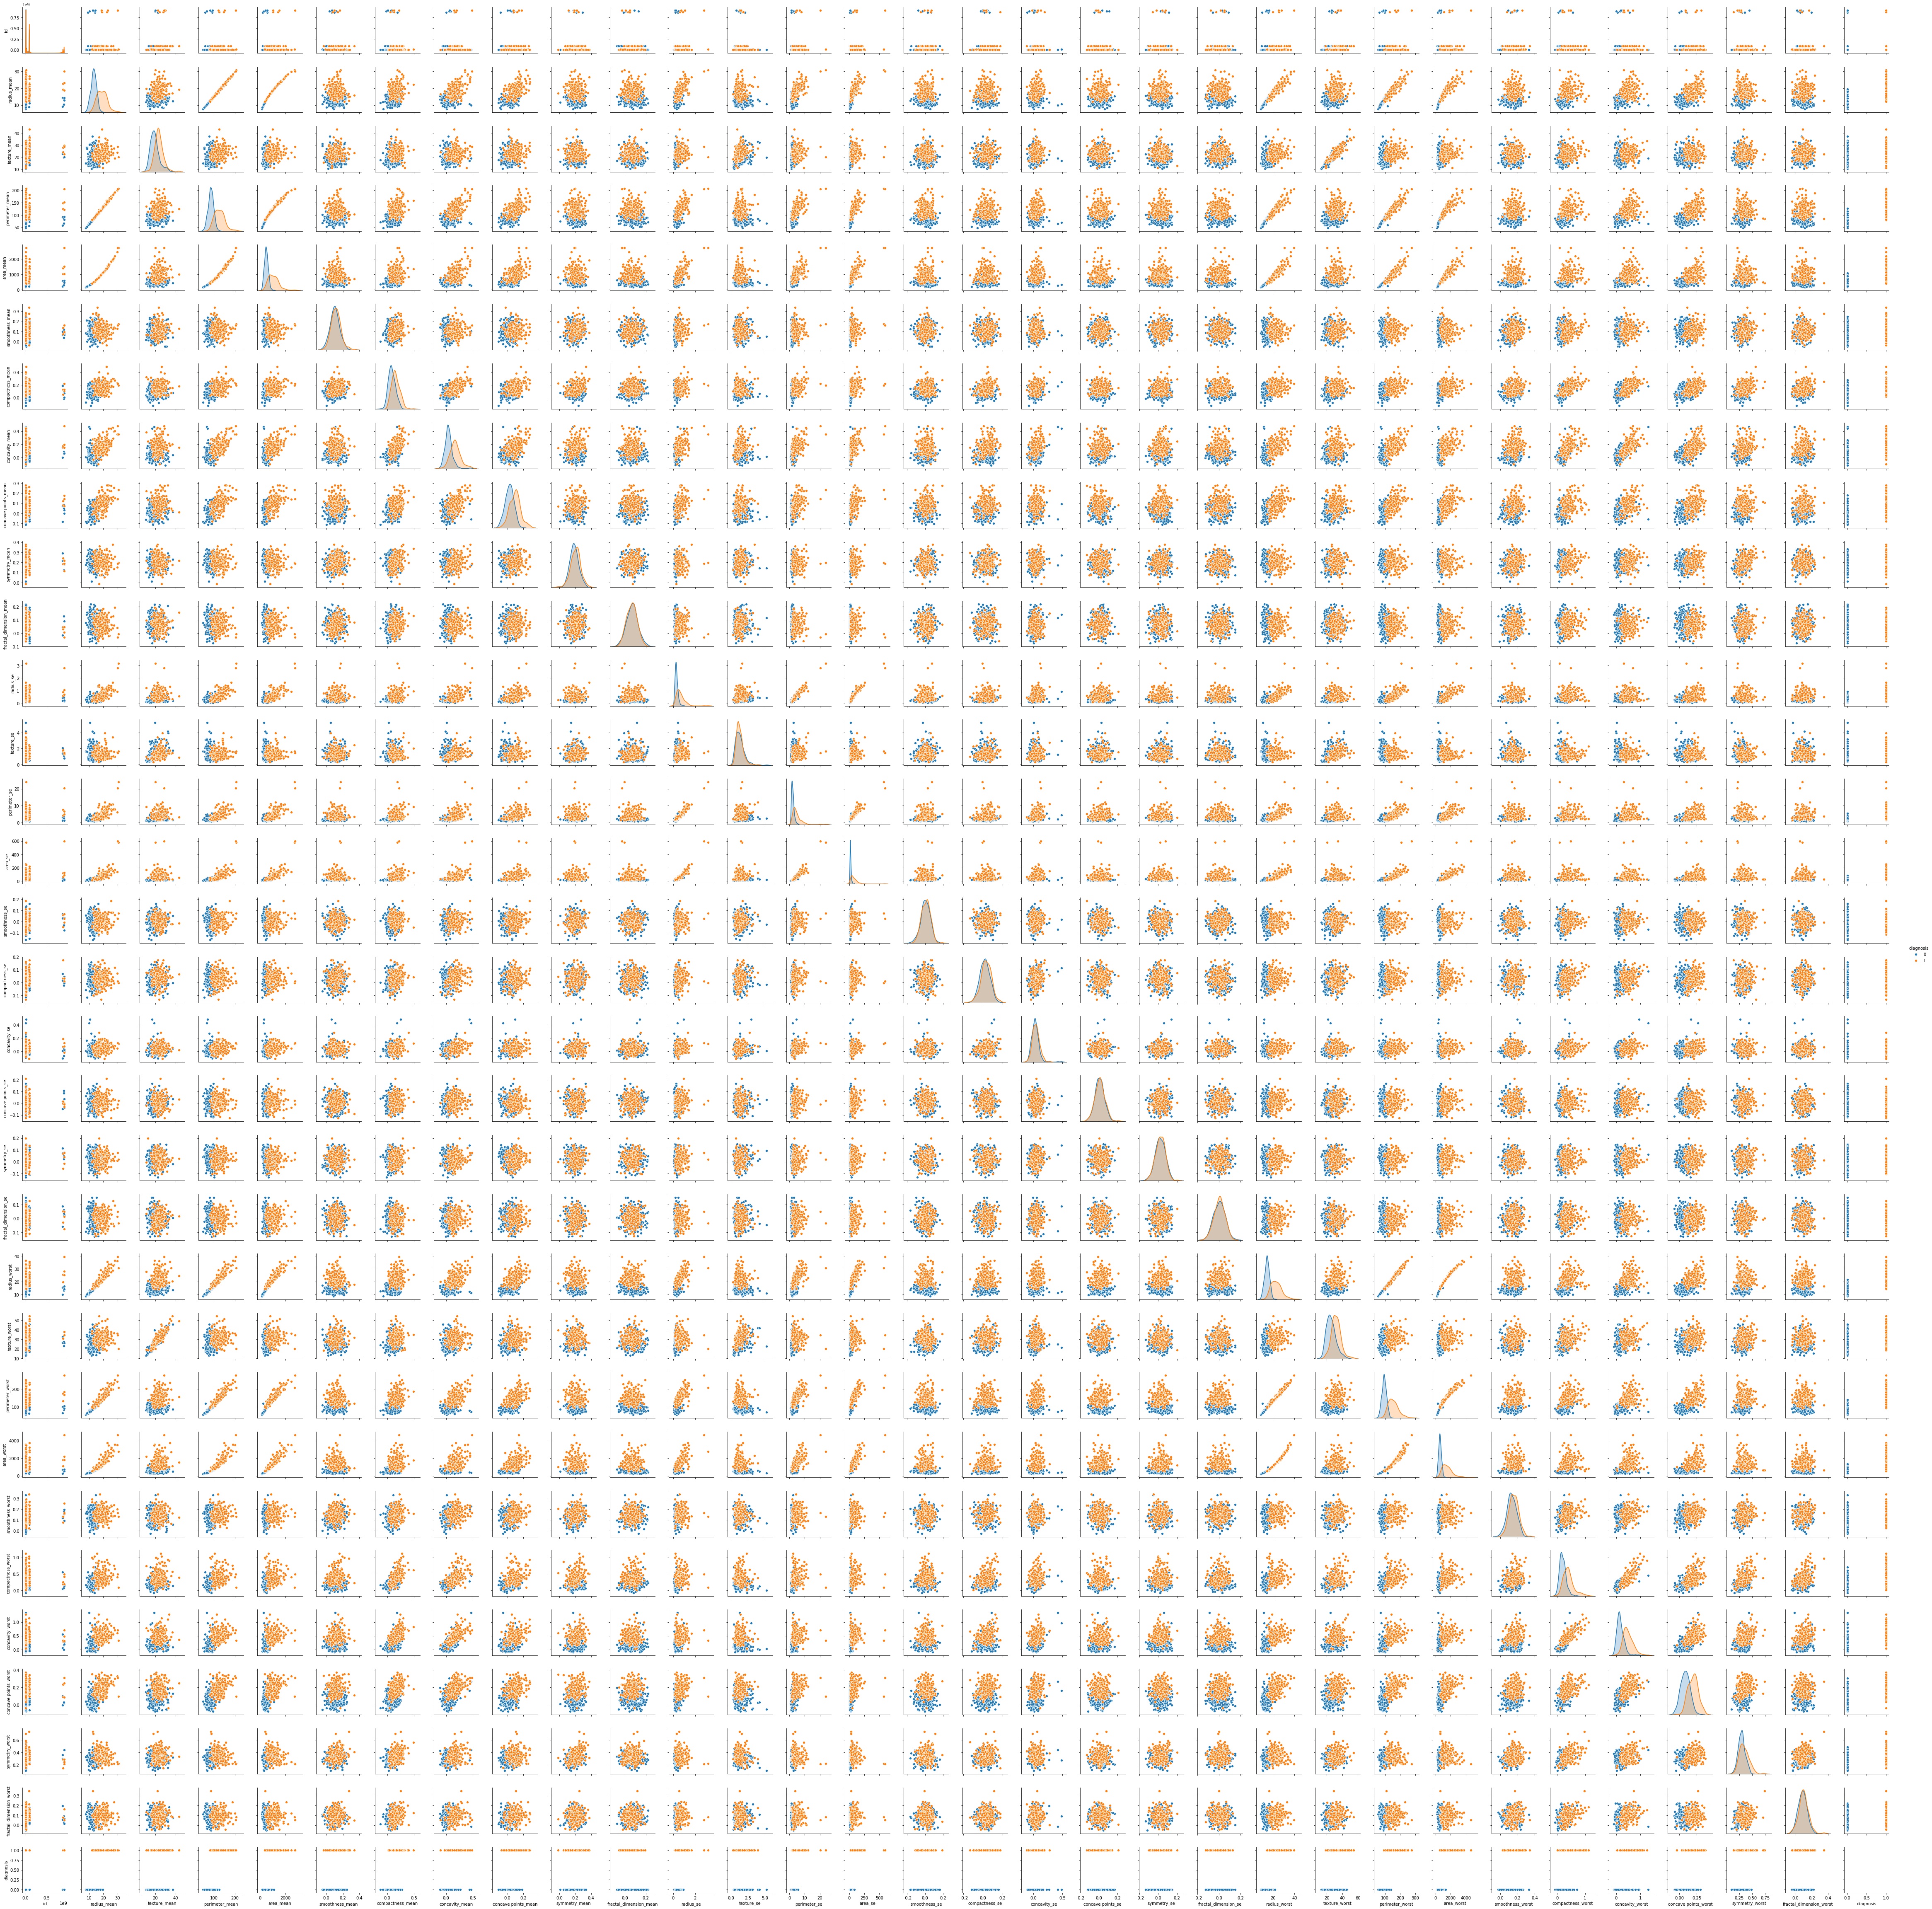

In [16]:
#Density
sns.pairplot(data,hue='diagnosis',size=2)

##Machine Learning Model selection##

In [0]:
#Confusion matrix visualization function 
from sklearn.metrics import classification_report as cr
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [0]:
#outSample data to be used as a test case
data_1 = pd.read_csv("Predict_these_cases.csv")
X_1 = data_1.values[:,1:31]

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = data.values[:,1:31]
y = data.values[:,31]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_1 = sc.transform(X_1)

###Dimensionality Reduction###

In this dataset, dimensionality reduction is possible, i.e., it should be opted here because of high correlation between the variables. Kindly refer to heatmap and density plot above which describes the correlation between the variables.<br>
<br>
Dimensionality reduction technique for feature selection by reducing the dataset dimension.

Here, I'm chosing two types of dimensionality reduction, i.e., random forest for feature selection and PCA for components of data.
####Random Forest Classifier



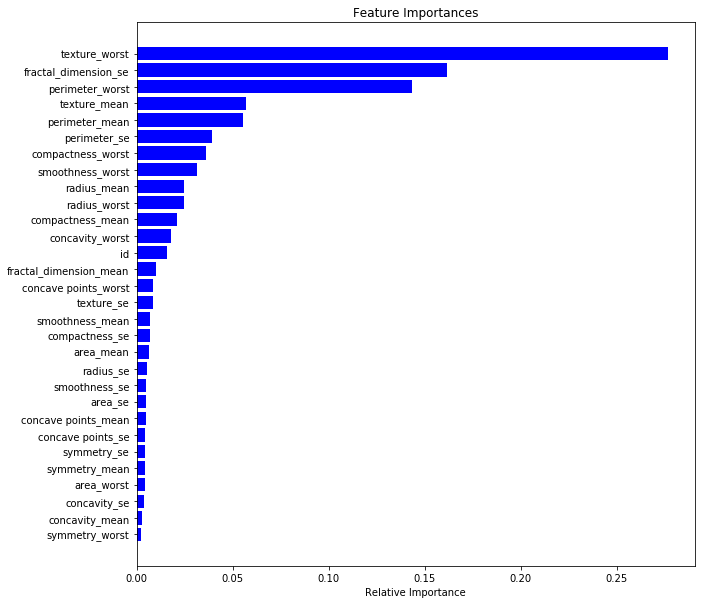

In [49]:
from sklearn.ensemble import RandomForestClassifier
#model = RandomForestClassifier(n_estimators=100, max_features=30, random_state=0, max_depth=30)
model = RandomForestClassifier(n_estimators=100, max_features=10, random_state=0, max_depth=10)

model.fit(X_train,y_train)

features = data.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-30:]  # top 10 features
plt.figure(figsize=(10, 10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

accuracy for training data: 1.000
accuracy for test data: 0.982
Prediction for out sample data provided:  [0. 0. 0. 1. 1. 1. 1. 1. 1. 0.]
Confusion matrix, without normalization
[[67  2]
 [ 0 45]]
Report: 
               precision    recall  f1-score   support

         0.0       1.00      0.97      0.99        69
         1.0       0.96      1.00      0.98        45

    accuracy                           0.98       114
   macro avg       0.98      0.99      0.98       114
weighted avg       0.98      0.98      0.98       114



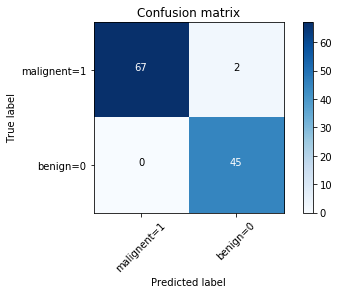

In [50]:
from sklearn import metrics

print('accuracy for training data: {:.3f}'.format(model.score(X_train,y_train)))
print('accuracy for test data: {:.3f}'.format(model.score(X_test, y_test)))


#Insample prediction
Y_test_pred = model.predict(X_test)
# OutSample prediction
y_pred=model.predict(X_1)
print("Prediction for out sample data provided: ",y_pred)

# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test_pred, y_test)

# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['malignent=1','benign=0'],normalize= False,  title='Confusion matrix')

#Recall Report
report = cr(Y_test_pred, y_test)
print("Report: \n", report)

In [51]:
#Selecting features from above model
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(model, threshold=0.05)
sfm.fit(X_train, y_train)

for feature_list_index in sfm.get_support(indices=True):
    print(data.columns[feature_list_index])

texture_mean
perimeter_mean
fractal_dimension_se
texture_worst
perimeter_worst


From the visualization and the feature selection model (via SelectFromModel), the above features are the most effective for the model. Let's train the model with these features only and conclude the change.

In [0]:
X_1_train = sfm.transform(X_train)
X_1_test = sfm.transform(X_test)
X_1_1 = sfm.transform(X_1)

accuracy for training data: 1.000
accuracy for test data: 0.965
Predicted diagnosis from model with 3 features is:  [0. 0. 0. 1. 1. 1. 1. 1. 1. 0.]
Predition Error: 0.0
Confusion matrix, without normalization
[[67  4]
 [ 0 43]]
Report: 
               precision    recall  f1-score   support

         0.0       1.00      0.94      0.97        71
         1.0       0.91      1.00      0.96        43

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



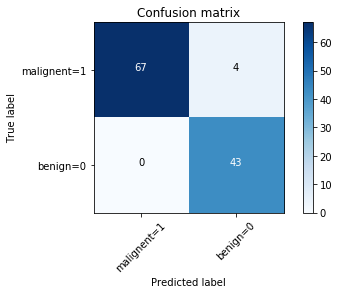

In [53]:
# Create a new random forest classifier for the most important features
model1 = RandomForestClassifier(n_estimators=100, random_state=0)

# Train the new classifier on the new dataset containing the most important features
model1.fit(X_1_train, y_train)

print('accuracy for training data: {:.3f}'.format(model1.score(X_1_train,y_train)))
print('accuracy for test data: {:.3f}'.format(model1.score(X_1_test,y_test)))

Y_test_pred1 = model1.predict(X_1_test)
y_important_pred=model1.predict(X_1_1)
print("Predicted diagnosis from model with 3 features is: ",y_important_pred)
#Checking difference error from above model and new model
print("Predition Error:",np.mean((y_important_pred - y_pred) ** 2))

# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test_pred1, y_test)

# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['malignent=1','benign=0'],normalize= False,  title='Confusion matrix')

#Recall Report
report = cr(Y_test_pred1, y_test)
print("Report: \n", report)

Out of 30 features given in the dataset, five important features calculated from dimentionality reduction have 93% impact on the model, which is just 1% less than the model with 30 features. As per the statistics, the model should be parsimonious also which four feature model is behaving.

Hence, with the new model having accuracy 93% the out sample evaluation predicts the same diagnosis than the model with 94.2% accuracy.



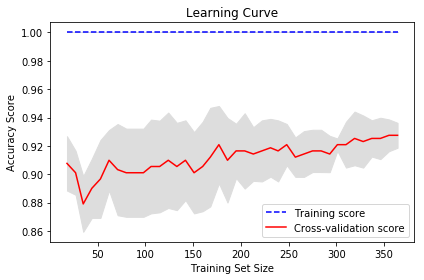

In [54]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(model1,X_1_train,y_train,cv=5,scoring='accuracy',train_sizes=np.linspace(0.05, 1.0, 40))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="b",  label="Training score")
plt.plot(train_sizes, test_mean, color="r", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

From the learning curve, the training line is constant at 1, this actually shows overfitting of the data. The regularization, K-fold or ensemble technique can be used to avoid this overfitting. I've shown this setting using Random forest model in PCA analysis below. 

####Pricipal Component Ananlysis

<Figure size 432x288 with 0 Axes>

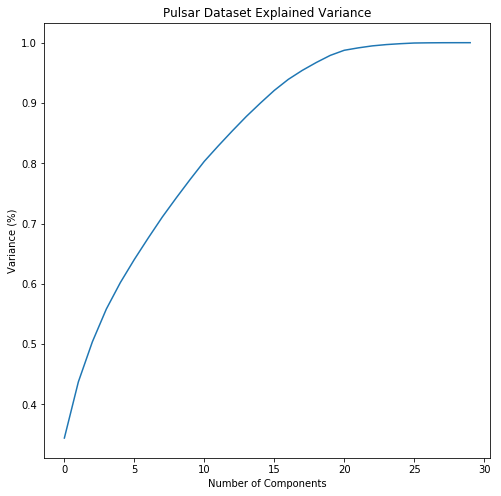

In [55]:
# Feature Extraction with PCA
import numpy as np
from sklearn.decomposition import PCA

#Fitting the PCA algorithm with training data
pca = PCA().fit(X_train)

#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.figure(figsize=(8, 8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Pulsar Dataset Explained Variance')
plt.show()

Number of components in PCA can be gained through the cumulative explained variance ratio as a function of the number of components. In the above vizualization, it can be seen that the 2D projection loses a lot of information and that I'd need about 22 components to retain more than 95% of the variance.

In [56]:
pca = PCA(n_components=22)
fit = pca.fit(X_train)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
X_1_pca = pca.transform(X_1)
# summarize components
print("Explained Variance:",fit.explained_variance_ratio_)
print(fit.components_)

Explained Variance: [0.34408473 0.0931534  0.06640718 0.05446953 0.043867   0.03836134
 0.03584965 0.0345868  0.03187398 0.03081362 0.02970003 0.02565886
 0.02478123 0.02392168 0.02210419 0.02115674 0.01831013 0.01493709
 0.01306532 0.01181786 0.00848668 0.00397928]
[[ 2.83065048e-01  1.35374037e-01  2.88858752e-01  2.86615612e-01
   4.15804387e-02  1.77488626e-01  2.38583231e-01  1.96609756e-01
   5.24322428e-02 -1.04083825e-02  2.38879682e-01  7.92112944e-04
   2.45769107e-01  2.49297697e-01  1.18315524e-02  5.42658737e-02
   7.46343838e-02  1.42735461e-02  1.49027613e-02  2.30851241e-04
   2.91237536e-01  1.33491690e-01  2.96150542e-01  2.89274158e-01
   6.16894466e-02  1.90249064e-01  2.22295485e-01  2.11030634e-01
   7.75141958e-02  4.01913875e-02]
 [ 1.63223020e-01 -5.54400181e-02  1.38803583e-01  1.80227126e-01
  -1.40845092e-01 -2.83432811e-01 -1.81812077e-01 -5.05954050e-02
  -2.65694812e-01 -1.30221648e-01  1.94300729e-01  6.62091869e-03
   1.55876463e-01  2.14233186e-01 -5.5

With the PCA components, I'm applying other classification methods 

####Logistic Regression####

accuracy for training data: 0.974
accuracy for test data: 0.991
Predicted diagnosis from logistic regression is:  [0. 0. 0. 1. 1. 1. 1. 1. 1. 0.]
Prediction Error: 0.0
Confusion matrix, without normalization
[[67  1]
 [ 0 46]]
Report: 
               precision    recall  f1-score   support

         0.0       1.00      0.99      0.99        68
         1.0       0.98      1.00      0.99        46

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



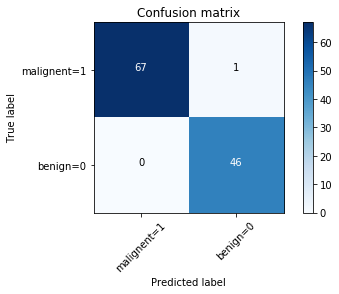

In [57]:
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression()
model2.fit(X_train_pca, y_train)

print('accuracy for training data: {:.3f}'.format(model2.score(X_train_pca,y_train)))
print('accuracy for test data: {:.3f}'.format(model2.score(X_test_pca, y_test)))

Y_test_pred2 = model2.predict(X_test_pca)

y_pred_2=model2.predict(X_1_pca)
print("Predicted diagnosis from logistic regression is: ",y_pred_2)

#Checking difference error from above model and new model
print("Prediction Error:",np.mean((y_important_pred - y_pred_2) ** 2))

# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test_pred2, y_test)

# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['malignent=1','benign=0'],normalize= False,  title='Confusion matrix')

#Recall Report
report = cr(Y_test_pred2, y_test)
print("Report: \n", report)

In [58]:

from sklearn.metrics import jaccard_similarity_score

jaccard_similarity_score(Y_test_pred2, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.9912280701754386

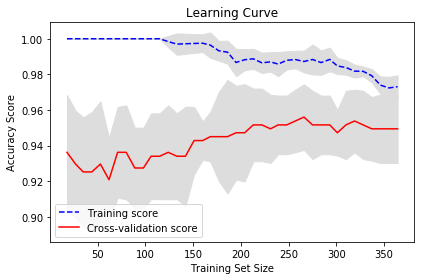

In [59]:
# Number of folds in cross-validation = 5
train_sizes, train_scores, test_scores = learning_curve(model2, X_train_pca,y_train,cv=5,scoring='accuracy',train_sizes=np.linspace(0.05, 1.0, 40))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="b",  label="Training score")
plt.plot(train_sizes, test_mean, color="r", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

Learning curve shows model is performing good.

####K-nearest neighbors####

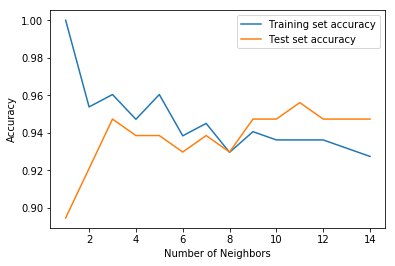

In [60]:
from sklearn.neighbors import KNeighborsClassifier 

#trying k nearest neighbor from 1 to 15
neighbors = range(1,15)

training_accuracy = []
test_accuracy = []

for n in neighbors:
    model3 = KNeighborsClassifier(n_neighbors=n)
    model3.fit(X_train_pca,y_train)
    training_accuracy.append(model3.score(X_train_pca, y_train))
    test_accuracy.append(model3.score(X_test_pca, y_test))
    
    
plt.plot(neighbors,training_accuracy, label='Training set accuracy')
plt.plot(neighbors,test_accuracy, label='Test set accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.legend()    
    
    

From the vizualization, the best accuracy is at n = 3.

KNN accuracy: 
Printing the accuracy for 3 nearest neighbours: 
Accuracy of the training set: 0.960440
Accuracy of the test set: 0.947368
Predicted diagnosis from KNN is:  [0. 0. 0. 1. 1. 1. 1. 1. 1. 0.]
Preiction Error: 0.0
Confusion matrix, without normalization
[[67  6]
 [ 0 41]]
Report: 
               precision    recall  f1-score   support

         0.0       1.00      0.92      0.96        73
         1.0       0.87      1.00      0.93        41

    accuracy                           0.95       114
   macro avg       0.94      0.96      0.94       114
weighted avg       0.95      0.95      0.95       114



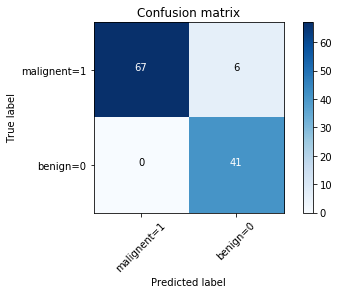

In [61]:
print("KNN accuracy: ")
print("Printing the accuracy for 3 nearest neighbours: ")
print("Accuracy of the training set: {:3f}".format(training_accuracy[2]))
print("Accuracy of the test set: {:3f}".format(test_accuracy[2]))

#testing
Y_test_pred3 = model3.predict(X_test_pca)

#Predicting out sample 
y_pred_3=model3.predict(X_1_pca)
print("Predicted diagnosis from KNN is: ",y_pred_3)
#Checking difference error from above model and new model
print("Preiction Error:",np.mean((y_pred_3 - y_pred_2) ** 2))

# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test_pred3, y_test)
# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['malignent=1','benign=0'],normalize= False,  title='Confusion matrix')

#Recall Report
report = cr(Y_test_pred3, y_test)
print("Report: \n", report)

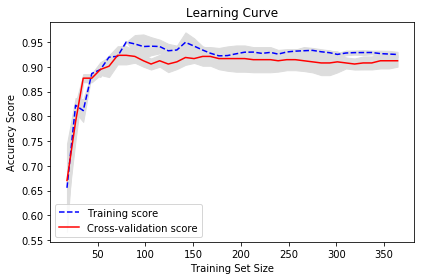

In [62]:
train_sizes, train_scores, test_scores = learning_curve(model3,X_train_pca,y_train,cv=5,scoring='accuracy',train_sizes=np.linspace(0.05, 1.0, 40))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="b",  label="Training score")
plt.plot(train_sizes, test_mean, color="r", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

####Decision Tree ####

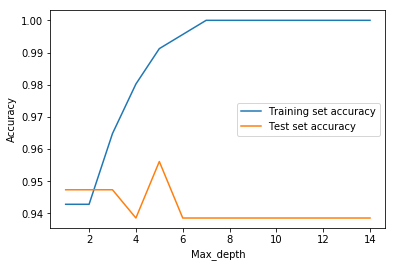

In [66]:
from sklearn.tree import DecisionTreeClassifier

#trying max_depth from 1 to 15
max_depth = range(1,15)

training_accuracy_DT = []
test_accuracy_DT = []

for d in max_depth:
  model4 = DecisionTreeClassifier(max_depth=d,random_state=0)
  model4.fit(X_train_pca,y_train)
  training_accuracy_DT.append(model4.score(X_train_pca, y_train))
  test_accuracy_DT.append(model4.score(X_test_pca, y_test))

#Plotting accuracy graph
plt.plot(max_depth,training_accuracy_DT, label='Training set accuracy')
plt.plot(max_depth,test_accuracy_DT, label='Test set accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Max_depth')
plt.legend()  

From the vizualization, the best accuracy is at max_depth = 5.

---



Decision Tree accuracy: 
Printing the accuracy with max_depth = 5: 
Accuracy of the training set: 0.991209
Accuracy of the test set: 0.956140
Predicted diagnosis from Decision Tree is:  [0. 0. 0. 1. 1. 1. 1. 1. 1. 0.]
Model Error: 0.0
Confusion matrix, without normalization
[[62  2]
 [ 5 45]]
Report: 
               precision    recall  f1-score   support

         0.0       0.93      0.97      0.95        64
         1.0       0.96      0.90      0.93        50

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.94       114
weighted avg       0.94      0.94      0.94       114



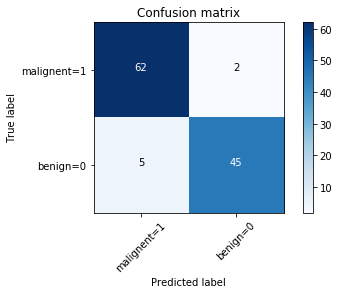

In [67]:
print("Decision Tree accuracy: ")
print("Printing the accuracy with max_depth = 5: ")
print("Accuracy of the training set: {:3f}".format(training_accuracy_DT[4]))
print("Accuracy of the test set: {:3f}".format(test_accuracy_DT[4]))

#testing
Y_test_pred4 = model4.predict(X_test_pca)
#Outsample testing
y_pred_4=model4.predict(X_1_pca)
print("Predicted diagnosis from Decision Tree is: ",y_pred_4)
#Checking difference error from above model and new model
print("Model Error:",np.mean((y_pred_4 - y_pred_2) ** 2))

# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test_pred4, y_test)

# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['malignent=1','benign=0'],normalize= False,  title='Confusion matrix')

#Recall Report
report = cr(Y_test_pred4, y_test)
print("Report: \n", report)

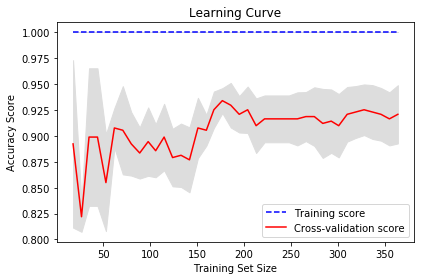

In [68]:
train_sizes, train_scores, test_scores = learning_curve(model4, X_train_pca,y_train,cv=5,scoring='accuracy',train_sizes=np.linspace(0.05, 1.0, 40))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="b",  label="Training score")
plt.plot(train_sizes, test_mean, color="r", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

Learning curve shows kind of overfitting.

####Random Forest (with PCA) ####

Random Forest along with PCA accuracy: 
Accuracy of the training set: 1.000000
Accuracy of the test set: 0.956140
Predicted diagnosis from Random Forest is:  [0. 0. 0. 1. 1. 1. 1. 1. 1. 0.]
Mean Square Error: 0.0
Confusion matrix, without normalization
[[65  3]
 [ 2 44]]
Report: 
               precision    recall  f1-score   support

         0.0       0.97      0.96      0.96        68
         1.0       0.94      0.96      0.95        46

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



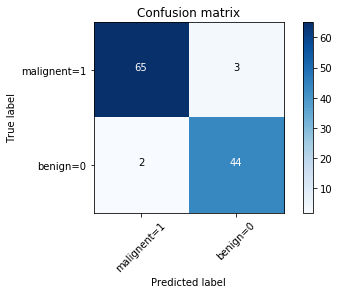

In [69]:
from sklearn.ensemble import RandomForestClassifier
model5 = RandomForestClassifier(n_estimators=100, random_state=0)
model5.fit(X_train_pca,y_train)

print("Random Forest along with PCA accuracy: ")
print("Accuracy of the training set: {:3f}".format(model5.score(X_train_pca, y_train)))
print("Accuracy of the test set: {:3f}".format(model5.score(X_test_pca, y_test)))

#testing
Y_test_pred5 = model5.predict(X_test_pca)
#Predicting Outsample
y_pred_5=model4.predict(X_1_pca)
print("Predicted diagnosis from Random Forest is: ",y_pred_5)
#Checking difference error from above model and new model
print("Mean Square Error:",np.mean((y_pred_5 - y_pred_2) ** 2))

# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test_pred5, y_test)
# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['malignent=1','benign=0'],normalize= False,  title='Confusion matrix')

#Recall Report
report = cr(Y_test_pred5, y_test)
print("Report: \n", report)

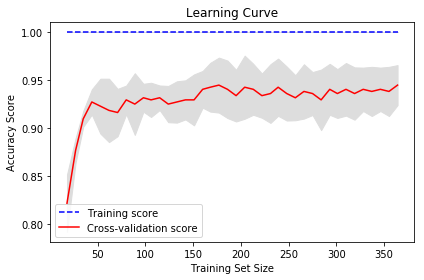

In [70]:
train_sizes, train_scores, test_scores = learning_curve(model5, X_train_pca,y_train,cv=5,scoring='accuracy',train_sizes=np.linspace(0.05, 1.0, 40))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="b",  label="Training score")
plt.plot(train_sizes, test_mean, color="r", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

Learning curve shows overfitting.

####XGBOOST####
Applying ensemble technique for improving model performance

accuracy for training data: 0.985
accuracy for test data: 0.965
Test case prediction:  [0. 0. 0. 1. 1. 1. 1. 1. 1. 0.]
Report: 
               precision    recall  f1-score   support

         0.0       0.99      0.96      0.97        69
         1.0       0.94      0.98      0.96        45

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114

Confusion matrix, without normalization
[[66  3]
 [ 1 44]]
RMSE: 0.187317


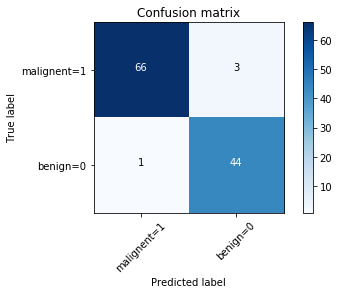

In [73]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline

pipe_lr = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 10)
#pipe_lr = Pipeline([('scl', StandardScaler()),
 #                   ('pca', PCA(n_components=18)),
  #                  ('xg_clf', xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
   #             max_depth = 5, alpha = 10, n_estimators = 10))])

pipe_lr.fit(X_train_pca, y_train)

y_pred = pipe_lr.predict(X_test_pca)
print('accuracy for training data: {:.3f}'.format(pipe_lr.score(X_train_pca,y_train)))
print('accuracy for test data: {:.3f}'.format(pipe_lr.score(X_test_pca, y_test)))

y_pred_test = pipe_lr.predict(X_1_pca)
print("Test case prediction: ", y_pred_test)

#Recall Report
report = cr(y_pred, y_test)
print("Report: \n", report)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_pred, y_test)

# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['malignent=1','benign=0'],normalize= False,  title='Confusion matrix')

rmse = np.sqrt(mean_squared_error(y_pred, y_test))
print("RMSE: %f" % (rmse))

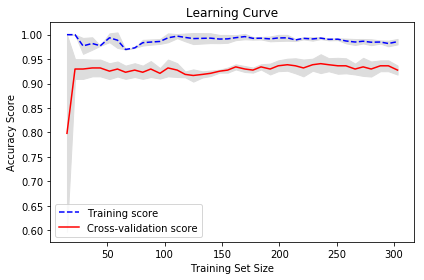

In [81]:
train_sizes, train_scores, test_scores = learning_curve(pipe_lr, X_train_pca,y_train,cv=3,scoring='accuracy',train_sizes=np.linspace(0.05, 1.0, 40))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="b",  label="Training score")
plt.plot(train_sizes, test_mean, color="r", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

###Naive Bayes###

SVM accuracy: 
Accuracy of the training set: 0.945055
Accuracy of the test set: 0.938596
Predicted diagnosis from NB is:  [0. 0. 0. 1. 1. 1. 1. 1. 1. 0.]
Mean Square Error: 0.0
Confusion matrix, without normalization
[[43  3]
 [ 4 64]]
Report: 
               precision    recall  f1-score   support

         0.0       0.96      0.94      0.95        68
         1.0       0.91      0.93      0.92        46

    accuracy                           0.94       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



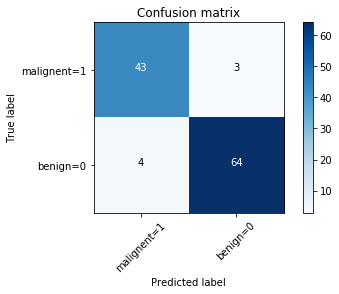

In [83]:
from sklearn.naive_bayes import GaussianNB
model6 = GaussianNB()

model6.fit(X_train_pca,y_train)

print("SVM accuracy: ")
print("Accuracy of the training set: {:3f}".format(model6.score(X_train_pca, y_train)))
print("Accuracy of the test set: {:3f}".format(model6.score(X_test_pca, y_test)))

#testing
Y_test_pred6 = model6.predict(X_test_pca)
#Predicting outsample
y_pred_6=model6.predict(X_1_pca)
print("Predicted diagnosis from NB is: ",y_pred_6)
#Checking difference error from above model and new model
print("Mean Square Error:",np.mean((y_pred_6 - y_pred_2) ** 2))

# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test_pred6, y_test, labels=[1,0])
# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['malignent=1','benign=0'],normalize= False,  title='Confusion matrix')

#Recall Report
report = cr(Y_test_pred6, y_test)
print("Report: \n", report)

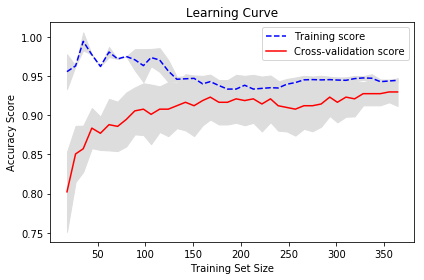

In [84]:
from sklearn.model_selection import ShuffleSplit
train_sizes, train_scores, test_scores = learning_curve(model6, 
                                                        X_train_pca, 
                                                        y_train,
                                                        # Number of folds in cross-validation
                                                        cv = 5,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # 40 different sizes of the training set
                                                        train_sizes=np.linspace(.05, 1., 40))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="b",  label="Training score")
plt.plot(train_sizes, test_mean, color="r", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

###Stochastic Gradiant classifier###

SGD accuracy: 
Accuracy of the training set: 0.953846
Accuracy of the test set: 0.991228
Predicted diagnosis from SVM is:  [0. 0. 0. 1. 1. 1. 1. 1. 1. 0.]
Model Error: 0.0
Confusion matrix, without normalization
[[46  0]
 [ 1 67]]
Report: 
               precision    recall  f1-score   support

         0.0       1.00      0.99      0.99        68
         1.0       0.98      1.00      0.99        46

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



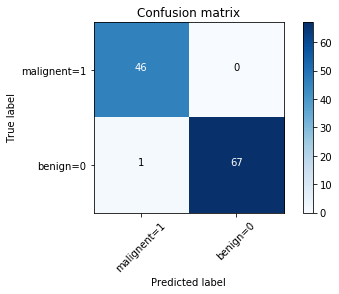

In [86]:
from sklearn.linear_model import SGDClassifier

model7 = SGDClassifier()
model7.fit(X_train_pca,y_train)

print("SGD accuracy: ")
print("Accuracy of the training set: {:3f}".format(model7.score(X_train_pca, y_train)))
print("Accuracy of the test set: {:3f}".format(model7.score(X_test_pca, y_test)))

#testing
Y_test_pred7 = model7.predict(X_test_pca)
#Predicting outsample
y_pred_7=model7.predict(X_1_pca)
print("Predicted diagnosis from SVM is: ",y_pred_7)
#Checking difference error from above model and new model
print("Model Error:",np.mean((y_pred_7 - y_pred_2) ** 2))

# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test_pred7, y_test, labels=[1,0])
# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['malignent=1','benign=0'],normalize= False,  title='Confusion matrix')

#Recall Report
report = cr(Y_test_pred7, y_test)
print("Report: \n", report)

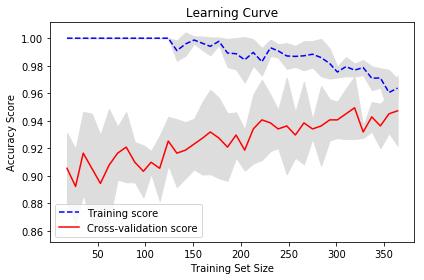

In [87]:
from sklearn.model_selection import ShuffleSplit
train_sizes, train_scores, test_scores = learning_curve(model7, 
                                                        X_train_pca, 
                                                        y_train,
                                                        # Number of folds in cross-validation
                                                        cv = 5,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # 40 different sizes of the training set
                                                        train_sizes=np.linspace(.05, 1., 40))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="b",  label="Training score")
plt.plot(train_sizes, test_mean, color="r", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

###Support Vector Machines###

SVM accuracy: 
Accuracy of the training set: 0.984615
Accuracy of the test set: 0.964912
Predicted diagnosis from SVM is:  [0. 0. 0. 1. 1. 1. 1. 1. 1. 0.]
Mean Square Error: 0.0
Confusion matrix, without normalization
[[43  0]
 [ 4 67]]
Report: 
               precision    recall  f1-score   support

         0.0       1.00      0.94      0.97        71
         1.0       0.91      1.00      0.96        43

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



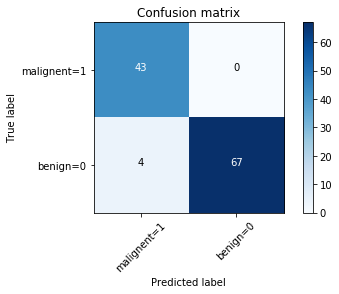

In [88]:
from sklearn.svm import SVC   

model8 = SVC()
model8.fit(X_train_pca,y_train)

print("SVM accuracy: ")
print("Accuracy of the training set: {:3f}".format(model8.score(X_train_pca, y_train)))
print("Accuracy of the test set: {:3f}".format(model8.score(X_test_pca, y_test)))

#testing
Y_test_pred8 = model8.predict(X_test_pca)
#Predicting outsample
y_pred_8=model8.predict(X_1_pca)
print("Predicted diagnosis from SVM is: ",y_pred_8)
#Checking difference error from above model and new model
print("Mean Square Error:",np.mean((y_pred_8 - y_pred_2) ** 2))

# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test_pred8, y_test, labels=[1,0])
# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['malignent=1','benign=0'],normalize= False,  title='Confusion matrix')

#Recall Report
report = cr(Y_test_pred8, y_test)
print("Report: \n", report)

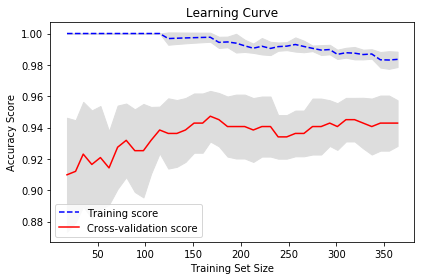

In [92]:
from sklearn.model_selection import ShuffleSplit
train_sizes, train_scores, test_scores = learning_curve(model8, 
                                                        X_train_pca, 
                                                        y_train,
                                                        # Number of folds in cross-validation
                                                        cv = 5,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # 40 different sizes of the training set
                                                        train_sizes=np.linspace(.05, 1., 40))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="b",  label="Training score")
plt.plot(train_sizes, test_mean, color="r", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

####Neural Network####

Neural Network accuracy: 
Accuracy of the training set: 1.000000
Accuracy of the test set: 0.964912





<Figure size 432x288 with 0 Axes>

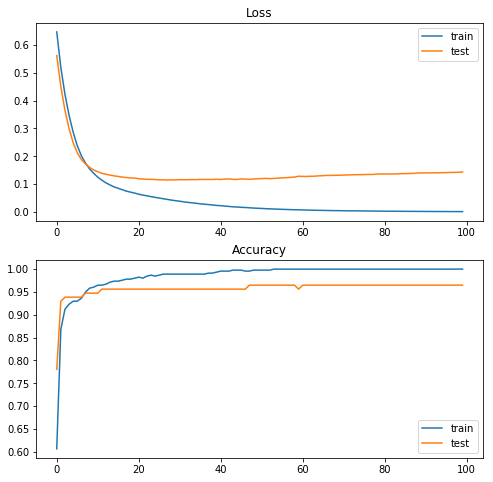

In [95]:
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot as plt

# define model
model9 = Sequential()
model9.add(Dense(20, input_dim=22, activation='relu'))
model9.add(Dense(50, activation='relu'))
#model9.add(Dense(50, activation='relu'))
model9.add(Dense(1, activation='sigmoid'))
# compile model
model9.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
history = model9.fit(X_train_pca,y_train, validation_data=(X_test_pca, y_test), epochs=100, verbose=0)
#history = model7.fit(X_train,y_train, validation_data=(X_test, y_test), epochs=100, verbose=0)
# evaluate the model
_, train_acc = model9.evaluate(X_train_pca,y_train, verbose=0)
_, test_acc = model9.evaluate(X_test_pca, y_test, verbose=0)

print("Neural Network accuracy: ")
print("Accuracy of the training set: {:3f}".format(train_acc))
print("Accuracy of the test set: {:3f}".format(test_acc))

# plot loss during training
plt.figure()
plt.figure(figsize=(8, 8))
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
print("\n\n")
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show()

Predicted diagnosis from NN is:  [0, 0, 0, 1, 1, 1, 1, 1, 1, 0]
Model Error: 0.48
Confusion matrix, without normalization
[[45  2]
 [ 2 65]]
Report: 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        67
           1       0.96      0.96      0.96        47

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



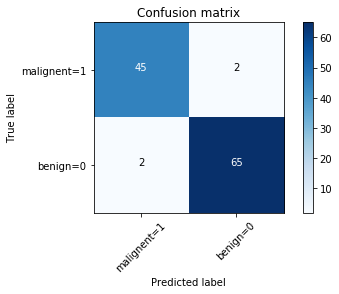

In [96]:
Y_test_pred9 = model9.predict_classes(X_test_pca, verbose=0)

y_pred_9=model9.predict_classes(X_1_pca, verbose=0)
#Data transformation
y_pred_9_=[]
for n in range(0,10):
  y_pred_9_.append(y_pred_9[n][0])
  
print("Predicted diagnosis from NN is: ",y_pred_9_)
#Checking difference error from above model and new model
print("Model Error:",np.mean((y_pred_9_ - y_pred_9) ** 2))

# Compute confusion matrix
cnf_matrix_ = confusion_matrix(Y_test_pred9, y_test, labels=[1,0])
# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_, classes=['malignent=1','benign=0'],normalize= False,  title='Confusion matrix')

#Recall Report
from sklearn.metrics import classification_report as cr
report = cr(Y_test_pred9, y_test)
print("Report: \n", report)

In [97]:
#Applying Kfolds for model improvement 

from sklearn.model_selection import StratifiedKFold
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# define 5-fold cross validation test harness
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
cvscores = []
for train, test in kfold.split(X_train_pca,y_train):
  model10 = Sequential()
  model10.add(Dense(20, input_dim=22,activation='relu'))
  model10.add(Dense(50, activation='relu'))
  model10.add(Dense(1, activation='sigmoid'))
  model10.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  history = model10.fit(X_train_pca,y_train,validation_data=(X_test_pca, y_test), epochs=100, batch_size=10, verbose=0)
  scores = model10.evaluate(X_test_pca,y_test, verbose=0)
  print("%s: %.2f%%" % (model10.metrics_names[1], scores[1]*100))
  cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

acc: 96.49%
acc: 96.49%
acc: 92.11%
acc: 94.74%
acc: 96.49%
95.26% (+/- 1.72%)


From all the above models, I will choose logistic regression, SVM, KNN and neural network for classification. They are almost performing the same.